In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
# Load CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


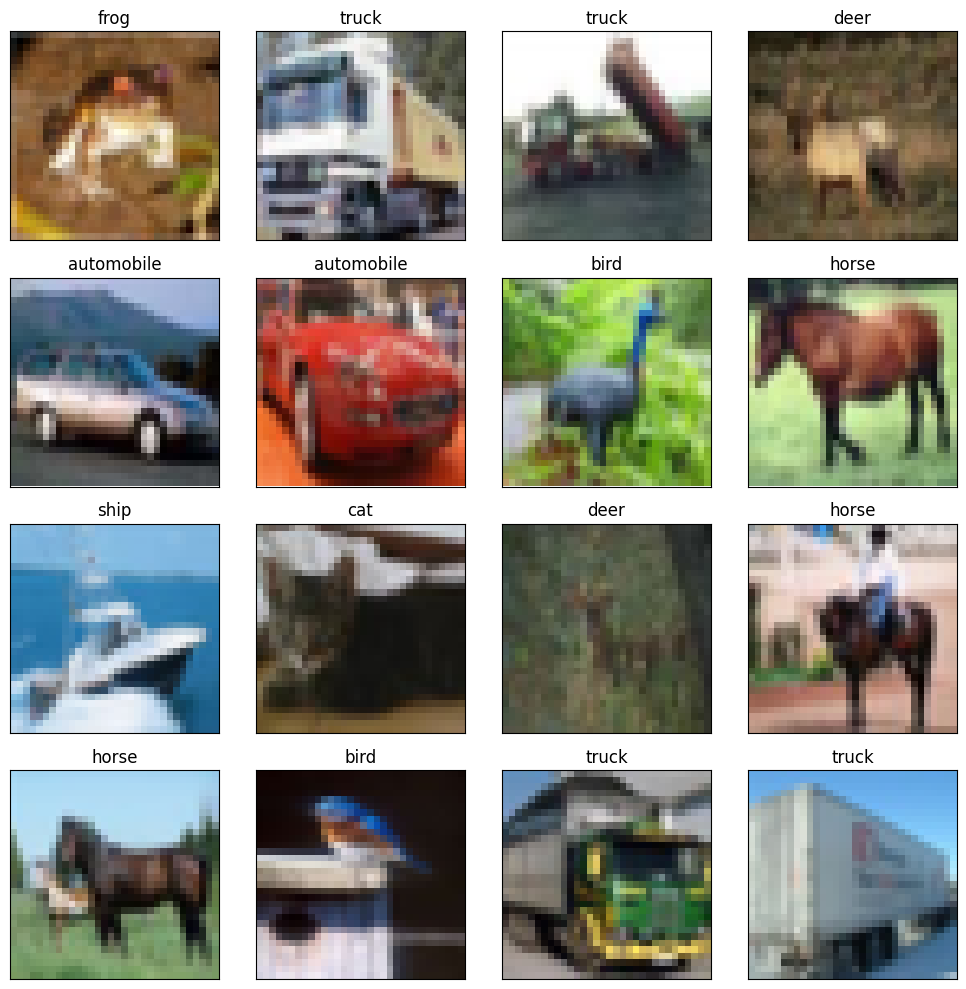

In [9]:
# CIFAR-10 Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(16):   # Plot 16 images
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # Show label as title
    plt.title(class_names[train_labels[i][0]])
plt.tight_layout()
plt.show()


In [3]:
# Define a simple CNN model
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.Flatten(),

        layers.Dense(64, activation='relu'),
        layers.Dense(10)  # 10 output classes
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model


In [5]:
# Train CNN without data augmentation
# Create a fresh model
model_without_aug = create_cnn_model()

# Train the model
history_without_aug = model_without_aug.fit(
    train_images, train_labels, epochs=10,
    validation_data=(test_images, test_labels)
)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 44ms/step - accuracy: 0.3568 - loss: 1.7387 - val_accuracy: 0.5502 - val_loss: 1.2548
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.5772 - loss: 1.1938 - val_accuracy: 0.5991 - val_loss: 1.1251
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.6396 - loss: 1.0264 - val_accuracy: 0.6551 - val_loss: 0.9935
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.6799 - loss: 0.9165 - val_accuracy: 0.6780 - val_loss: 0.9304
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.7040 - loss: 0.8292 - val_accuracy: 0.6843 - val_loss: 0.9006
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 51ms/step - accuracy: 0.7318 - loss: 0.7634 - val_accuracy: 0.6972 - val_loss: 0.8775
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 47ms/step - accuracy: 0.7519 - loss: 0.7054 - val_accuracy: 0.7026 - val_loss: 0.8659
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.7679 -

In [6]:
# Apply Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Fit the data generator (this computes quantities like mean and std for normalization if needed)
datagen.fit(train_images)


In [7]:
# Train CNN with augmented data
# Create a fresh model again
model_with_aug = create_cnn_model()

# Train the model using data generator
history_with_aug = model_with_aug.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=10,
    validation_data=(test_images, test_labels)
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 127ms/step - accuracy: 0.2934 - loss: 1.8956 - val_accuracy: 0.4835 - val_loss: 1.4244
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 123ms/step - accuracy: 0.4778 - loss: 1.4366 - val_accuracy: 0.5448 - val_loss: 1.2781
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 117ms/step - accuracy: 0.5419 - loss: 1.2888 - val_accuracy: 0.6103 - val_loss: 1.0871
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 119ms/step - accuracy: 0.5743 - loss: 1.2015 - val_accuracy: 0.6249 - val_loss: 1.0532
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.5987 - loss: 1.1302 - val_accuracy: 0.6365 - val_loss: 1.0406
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.6160 - loss: 1.0864 - val_accuracy: 0.6621 - val_loss: 0.9573
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.6309 - loss: 1.0553 - val_accuracy: 0.6636 - val_loss: 0.9698
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 116ms/step - accuracy: 0.6385 - loss: 1.0207 - v

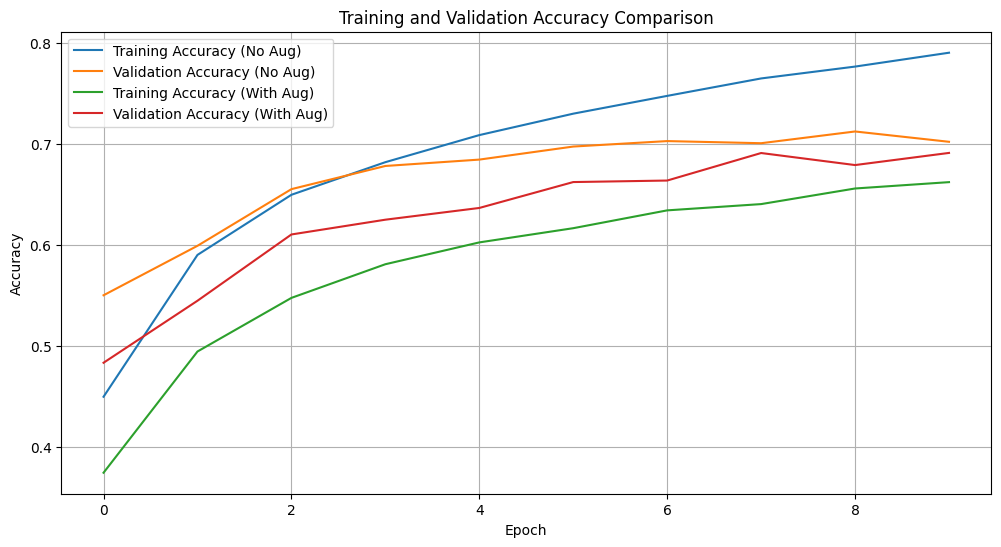

In [8]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Without augmentation
plt.plot(history_without_aug.history['accuracy'], label='Training Accuracy (No Aug)')
plt.plot(history_without_aug.history['val_accuracy'], label='Validation Accuracy (No Aug)')

# With augmentation
plt.plot(history_with_aug.history['accuracy'], label='Training Accuracy (With Aug)')
plt.plot(history_with_aug.history['val_accuracy'], label='Validation Accuracy (With Aug)')

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
